<a href="https://colab.research.google.com/github/arienox/Bioactivity--Drug-Discovery/blob/main/Bioactivity_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.c

# **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Load the data set

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.026872
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.869666
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.882397
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.974694
129,129,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.995679
130,130,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.939302
131,131,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.970616


# **3.Input features **
The Acetylocholinesterase data set contains 881 input features and 1 output variable(pIC50 values)

# 3.1 Input features

In [ ]:
x= df.drop('pIC50', axis = 1)
x

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,129,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,130,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,131,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3.2 Output Features

In [ ]:
y = df.pIC50
y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
128    4.974694
129    4.995679
130    4.939302
131    4.970616
132    4.102923
Name: pIC50, Length: 133, dtype: float64

# 3.3 Let's examine the data dimension

In [ ]:
x.shape, y.shape

((133, 882), (133,))

# 3.4 Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

# **4. Data Split (80/20 ratio)**

In [ ]:
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, y_train.shape

((106, 882), (106,))

In [ ]:
x_test.shape, y_test.shape

((27, 882), (27,))

# **Builiding a Regresssion Model using Random Forest**

In [ ]:
import numpy as np
np.random.seed(100) #this allows you to obtain the same results when running your code multiple times, even if it involves random processes.
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
r2

0.5785283611561781

In [ ]:
y_pred = model.predict(x_test)

# **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

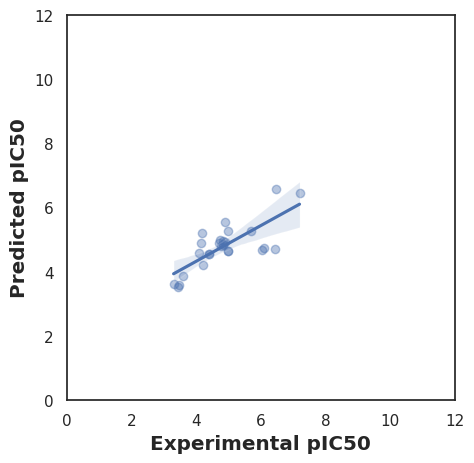

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to work with DataFrames

sns.set(color_codes=True)
sns.set_style("white")

# Create a DataFrame from y_test and y_pred
df = pd.DataFrame({'Experimental pIC50': y_test, 'Predicted pIC50': y_pred})

# Use regplot with the DataFrame
ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=df, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()